In [1]:
#Import Qiskit and Qiskit.Visualization and math for the phase shift gates
import qiskit
from qiskit import QuantumCircuit, assemble, Aer,execute
from qiskit.visualization import plot_bloch_multivector
from math import sqrt, pi

In [2]:
#Set Current Qiskit Backend to QASM Simulator 
#Switch if using IBM Quantum Computers
sim=Aer.get_backend('qasm_simulator')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
#Intializes Quantum Circuit with 6 Qubits and 3 Classical Bits
qc=QuantumCircuit(6,3)

#Amount of times simulation is run
sim_run=1

In [4]:
#Sets Qubits 3-6 into superposition(|+> basis) using controlled x gate and phase shift s gate
for x in range(3,6):
    qc.rx(pi/2,x)#Set to |-i>
    qc.s(x)#Set to |+>
    
    ##Collapses superposition of Qubit 3-6 and assigns value to corrosponding Classical bit
    qc.measure(x,x-3)

qc.barrier()

In [5]:
#Run code to check Bloch spheres of Qubits in superposition(|+> basis)
#qc.save_statevector()
#qobj=assemble(qc)
#result=sim.run(qobj).result().get_statevector()
#plot_bloch_multivector(result)

In [6]:
#sets Qubits 1-3 into superposition(|+> or |-> basis) based on if Qubits 3-6 were measured as |0> or |1>
for x in range(0,3):
    qc.ry(pi/2,x)#Set to |+>
    qc.cz(x+3,x)#Set to |-> if control qubit is |1>,else stays at |+>
    qc.ry(-pi,x)#Set to |+> if qubit was at |->,else shifts to |->


In [7]:
#Run code to check Bloch spheres of Qubits 1-3 in superposition(|+>  or |-> basis) and Qubits 3-6 (|0> or |1> basis)
#qc.save_statevector()
#qobj=assemble(qc)
#result=sim.run(qobj).result().get_statevector()
#plot_bloch_multivector(result)

In [8]:
#Overwrites Classical bit values stored from Qubits 3-6 with values from measured Qubits 1-3
for x in range(0,3):
    qc.measure(x,x)

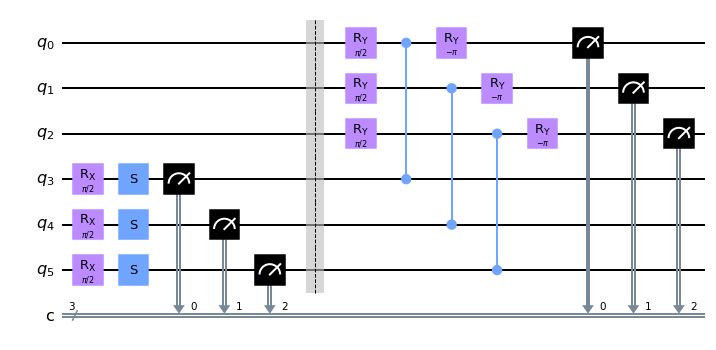

In [9]:
#Creates barrier between gates for qc.draw() and optimization level
qc.draw()

In [10]:
#Function to convert Qubits to Base 10 and displays randomly generated number
def Generate():
    #memory=True to access indivual simulation qubit measurement values
    job=execute(qc,sim,shots=sim_run,memory=True)
    result=job.result()
    counts=result.get_counts()
    memory=result.get_memory()
    
    #Converts Qubits to Base 10
    int_value=int(memory[0],2)
    
    #Check int_value throughout iterations
    #print(int_value)
    
    if int_value==7 or int_value==0:
        Generate()
    else:
        print("Random Number Generated:", int_value)

In [11]:
Generate()

Random Number Generated: 5
